In [1]:
import re
import math
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,precision_score , recall_score , confusion_matrix , f1_score
from sklearn.model_selection import GridSearchCV
from ast import literal_eval
from gensim.models.keyedvectors import KeyedVectors
from sklearn.decomposition import PCA
pca = PCA(n_components=40)
from sklearn import datasets, metrics, model_selection
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
#data_train = pd.read_csv('./data/twitter_data_before_analysis.csv', error_bad_lines=False)
data_train = pd.read_csv('./data/twitter_data_before_analysis1.csv', error_bad_lines=False)
data_train = data_train.append(pd.read_csv('./data/ko_news_data_before_analysis.csv', error_bad_lines=False))
data_train = data_train.append(pd.read_csv('./data/en_news_data_before_analysis.csv', error_bad_lines=False))

In [3]:
data_train['period'] = pd.to_numeric(data_train['period'], errors='coerce')
data_train['category'] = pd.to_numeric(data_train['category'], errors='coerce')
data_train['label'] = pd.to_numeric(data_train['label'], errors='coerce')
data_train['Silhouette'] = pd.to_numeric(data_train['Silhouette'], errors='coerce')

In [4]:
result3index = data_train[data_train['result']==3].index

In [5]:
len(result3index)

24573

In [6]:
data_train = data_train.drop(result3index)

In [7]:
X_train = data_train[data_train.columns.difference(['result'])]

In [8]:
#x_data_df = data_train[['period','raw_data','closer#','category','label','Silhouette']]
y_train = data_train['result']

In [9]:
X_train = X_train.drop('Unnamed: 0', axis=1)

In [10]:
data_test = pd.read_csv('./data/(test)_twitter_data_before_analysis.csv', error_bad_lines=False)
data_test = data_test.append(pd.read_csv('./data/(test)_ko_news_data_before_analysis.csv', error_bad_lines=False))
data_test = data_test.append(pd.read_csv('./data/(test)_en_news_data_before_analysis.csv', error_bad_lines=False))

In [11]:
data_test['period'] = pd.to_numeric(data_test['period'], errors='coerce')
data_test['category'] = pd.to_numeric(data_test['category'], errors='coerce')
data_test['label'] = pd.to_numeric(data_test['label'], errors='coerce')
data_test['Silhouette'] = pd.to_numeric(data_test['Silhouette'], errors='coerce')

In [12]:
X_test = data_test[data_test.columns.difference(['result'])]

In [13]:
y_test = data_test['result']

In [14]:
X_test = X_test.drop('Unnamed: 0', axis=1)

In [15]:
rf_clf = RandomForestClassifier(random_state = 11 ,n_jobs=-1) # random forest

In [16]:
rf_clf.fit(X_train, y_train)

y_score = rf_clf.predict_proba(X_test)



In [17]:
rf_pred = rf_clf.predict(X_test)  # random forest predict

In [18]:
print('Random Forest Accuracy :  ',accuracy_score(y_test,rf_pred))
print('Random Forest Precision :  ',precision_score(y_test,rf_pred,pos_label='positive',average='weighted'))
print('Random Forest Recall :  ',recall_score(y_test,rf_pred,pos_label='positive',average='weighted'))
print('Random Forest f1 :  ',f1_score(y_test,rf_pred,pos_label='positive',average='weighted'))

Random Forest Accuracy :   0.8178172198993088
Random Forest Precision :   0.8856601644758998
Random Forest Recall :   0.8178172198993088
Random Forest f1 :   0.8263052259441362


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [19]:
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelBinarizer



# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

#y_test_roc =label_binarize(y_test, classes=[1,2])

lb = LabelBinarizer()
y_test_roc = lb.fit_transform(list(y_test))
y_test_roc = np.hstack((1 - y_test_roc,y_test_roc ))

print(y_test)
print(y_test_roc)
print(y_score)

for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print('class : ',i,'==',roc_auc[i])



0        1
1        1
2        1
3        1
4        1
        ..
16159    2
16160    2
16161    2
16162    2
16163    2
Name: result, Length: 23438, dtype: int64
[[1 0]
 [1 0]
 [1 0]
 ...
 [0 1]
 [0 1]
 [0 1]]
[[0.42 0.58]
 [0.27 0.73]
 [0.27 0.73]
 ...
 [0.32 0.68]
 [0.1  0.9 ]
 [0.09 0.91]]
class :  0 == 0.9763674141543269
class :  1 == 0.9763674141543269


In [20]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_roc.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

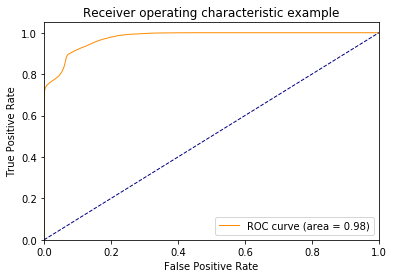

In [21]:
plt.figure()
lw = 1
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

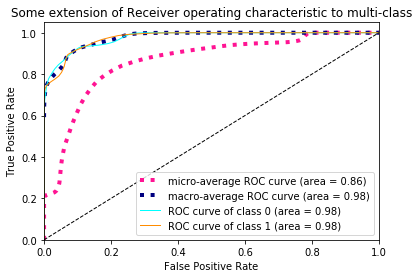

In [22]:
from scipy import interp
from itertools import cycle

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(2)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(2):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 2

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(2), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [23]:
dt_clf = DecisionTreeClassifier(random_state = 11)
dt_clf.fit(X_train,y_train)
dt_pred = dt_clf.predict(X_test)

In [24]:
print('Decision Tree Accuracy :  ',accuracy_score(y_test,dt_pred))
print('Decision Tree Precision :  ',precision_score(y_test,dt_pred,pos_label='positive',average='weighted'))
print('Decision Tree Recall :  ',recall_score(y_test,dt_pred,pos_label='positive',average='weighted'))
print('Decision Tree f1 :  ',f1_score(y_test,dt_pred,pos_label='positive',average='weighted'))

Decision Tree Accuracy :   0.5421537673862957
Decision Tree Precision :   0.7547765494468317
Decision Tree Recall :   0.5421537673862957
Decision Tree f1 :   0.5464964373989075


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [25]:
y_score = dt_clf.predict_proba(X_test)

In [26]:
fpr = dict()
tpr = dict()
roc_auc = dict()

In [27]:
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print('class : ',i,'==',roc_auc[i])

class :  0 == 0.6487497691843329
class :  1 == 0.6487497691843329


In [28]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_roc.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

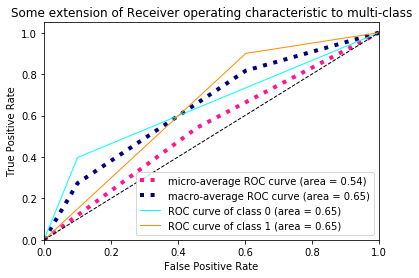

In [29]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(2)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(2):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 2

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(2), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [30]:
#gb_clf = GradientBoostingClassifier(random_state = 11) # random forest

In [31]:
#gb_clf.fit(X_train,y_train)
#gb_pred = gb_clf.predict(X_test)

In [32]:
#print('Gredient Boosting Accuracy :  ',accuracy_score(y_test,gb_pred))
#print('Gredient Boosting Precision :  ',precision_score(y_test,gb_pred,pos_label='positive',average='weighted'))
#print('Gredient Boosting Recall :  ',recall_score(y_test,gb_pred,pos_label='positive',average='weighted'))
#print('Gredient Boosting f1 :  ',f1_score(y_test,gb_pred,pos_label='positive',average='weighted'))

In [33]:
lgbm_clf =  LGBMClassifier(n_estimators=400,random_state = 11)

In [34]:
lgbm_clf.fit(X_train,y_train)

LGBMClassifier(n_estimators=400, random_state=11)

In [35]:
lgbm_pred = lgbm_clf.predict(X_test)

In [36]:
print('Light GBM Accuracy :  ',accuracy_score(y_test,lgbm_pred))
print('Light GBM Precision :  ',precision_score(y_test,lgbm_pred,pos_label='positive',average='weighted'))
print('Light GBM Recall :  ',recall_score(y_test,lgbm_pred,pos_label='positive',average='weighted'))
print('Light GBM f1 :  ',f1_score(y_test,lgbm_pred,pos_label='positive',average='weighted'))

Light GBM Accuracy :   0.8446113149586142
Light GBM Precision :   0.8990691277877834
Light GBM Recall :   0.8446113149586142
Light GBM f1 :   0.8516018308044044


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [37]:
y_score = lgbm_clf.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

In [38]:
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print('class : ',i,'==',roc_auc[i])

class :  0 == 0.9999988547991904
class :  1 == 0.9999988547991904


In [39]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_roc.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

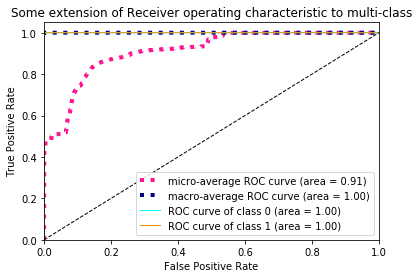

In [40]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(2)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(2):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 2

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(2), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [41]:
lr_clf = LogisticRegression(random_state = 11)

In [42]:
lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test)

In [43]:
print('Logistic Regression Accuracy :  ',accuracy_score(y_test,lr_pred))
print('Logistic Regression  Precision :  ',precision_score(y_test,lr_pred,pos_label='positive',average='weighted'))
print('Logistic Regression  Recall :  ',recall_score(y_test,lr_pred,pos_label='positive',average='weighted'))
print('Logistic Regression  f1 :  ',f1_score(y_test,lr_pred,pos_label='positive',average='weighted'))

Logistic Regression Accuracy :   0.7120061438689308
Logistic Regression  Precision :   0.5069527489071046
Logistic Regression  Recall :   0.7120061438689308
Logistic Regression  f1 :   0.59223239440187


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
y_score = lr_clf.predict_proba(X_test)

y_score = np.round(y_score,5)

fpr = dict()
tpr = dict()
roc_auc = dict()

In [45]:
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print('class : ',i,'==',roc_auc[i])

class :  0 == 0.5
class :  1 == 0.5


In [46]:

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_roc.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

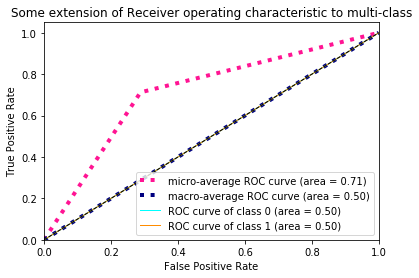

In [47]:


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(2)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(2):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 2

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(2), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [48]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [49]:
model = Sequential()
model.add(Dense(120, input_dim=105, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [53]:
# compile the keras model
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [54]:
from keras.utils import to_categorical

#y_train = y_train.apply(lambda x : x-1)


lb = LabelBinarizer()
y_train_keras = lb.fit_transform(list(y_train))
y_train_keras = np.hstack((1 - y_train_keras,y_train_keras ))



In [55]:
model.fit(X_train,y_train_keras, epochs=30, batch_size=500)

Epoch 1/30
152054/152054 [==============================] - 1s 7us/step - loss: 32.2974 - accuracy: 0.5015
Epoch 2/30
152054/152054 [==============================] - 1s 6us/step - loss: 13.8719 - accuracy: 0.4988
Epoch 3/30
152054/152054 [==============================] - 1s 6us/step - loss: 1.5247 - accuracy: 0.5017
Epoch 4/30
152054/152054 [==============================] - 1s 6us/step - loss: 2.5164 - accuracy: 0.5017
Epoch 5/30
152054/152054 [==============================] - 1s 6us/step - loss: 0.8046 - accuracy: 0.5067
Epoch 6/30
152054/152054 [==============================] - 1s 6us/step - loss: 0.8500 - accuracy: 0.5086
Epoch 7/30
152054/152054 [==============================] - 1s 6us/step - loss: 0.8890 - accuracy: 0.5084
Epoch 8/30
152054/152054 [==============================] - 1s 6us/step - loss: 0.7922 - accuracy: 0.5097
Epoch 9/30
152054/152054 [==============================] - 1s 6us/step - loss: 0.7713 - accuracy: 0.5101
Epoch 10/30
152054/152054 [=================

In [60]:
yhat_probs = model.predict_proba(X_test,batch_size=500)

yhat_classes = model.predict_classes(X_test,batch_size=500)

yhat_predict = model.predict(X_test,batch_size=500)

# reduce to 1d array
#yhat_probs = yhat_probs[:, 0]
#yhat_classes = yhat_classes[:, 0]

In [57]:
yhat_probs

array([[0.50926614, 0.49073395],
       [0.50926614, 0.49073395],
       [0.50926614, 0.49073395],
       ...,
       [0.50926614, 0.49073395],
       [0.50926614, 0.49073395],
       [0.50926614, 0.49073395]], dtype=float32)

In [63]:
y_test = y_test.apply(lambda x : x-1)

In [64]:
yhat_classes

array([0, 0, 0, ..., 0, 0, 0])

In [76]:
yhat_predict

array([[0.50926614, 0.49073395],
       [0.50926614, 0.49073395],
       [0.50926614, 0.49073395],
       ...,
       [0.50926614, 0.49073395],
       [0.50926614, 0.49073395],
       [0.50926614, 0.49073395]], dtype=float32)

In [77]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes )
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes , average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes , average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes,average='micro')
print('F1 score: %f' % f1)

Accuracy: 0.712006
Precision: 0.712006
Recall: 0.712006
F1 score: 0.712006


In [78]:
# from sklearn.metrics import roc_curve
# fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, yhat_classes, pos_label = 1)

In [79]:
# from sklearn.metrics import auc
# auc_keras = auc(fpr_keras, tpr_keras)

In [80]:
# plt.figure(1)
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')
# plt.title('ROC curve')
# plt.legend(loc='best')
# plt.show()

In [81]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

print(y_test_roc)
print(yhat_probs)


for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], yhat_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print('class : ',i,'==',roc_auc[i])

[[1 0]
 [1 0]
 [1 0]
 ...
 [0 1]
 [0 1]
 [0 1]]
[[0.50926614 0.49073395]
 [0.50926614 0.49073395]
 [0.50926614 0.49073395]
 ...
 [0.50926614 0.49073395]
 [0.50926614 0.49073395]
 [0.50926614 0.49073395]]
class :  0 == 0.5
class :  1 == 0.5


In [82]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_roc.ravel(), yhat_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


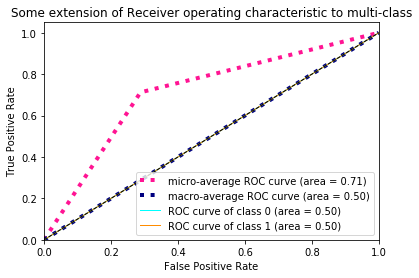

In [83]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(2)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(2):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 2

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(2), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()